# PA 3: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID:


## Submission Instructions


Step 1: Rename this file to 'yourNetID_PA3.ipnyb' and the report file to 'yourNetID_PA3.pdf' <br>

Step 2: Upload all the document separately onto canvas  <br>**Not in a zip file. 20 points will be deducted if you don't follow the instruction**  <br>
Note: Your submission should include ONLY the following files: <br>
    * apriory.py  <br>
    * yourNetID_PA3.ipynb  <br> 
    * yourNetID_PA3.pdf  <br> 
    * dataset.csv  <br>
    * toyDS.csv <br>

## Programming Assignment Details

Before you start:
- Note that this is an individual assignment.
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## ** Do Not Delete the Above Cell** <br>
10 points will be deducted if the instructions are not followed


## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import csv
import os
import apriori
from apriori import getItemSetTransactionList
from apriori import returnItemsWithMinSupport
from apriori import runApriori
from apriori import printResults
from apriori import dataFromFile
from apriori import joinSet
from apriori import subsets
from subprocess import check_output

### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


In [3]:
#from IPython.display import Image
#print ('ScreenShot of the toyDS.csv')
#Image("SampleScreen01.png")

In [4]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
# df_data dataFrame is created with head names as date,id,tran so that we can drop the quite simply
df_data = pd.DataFrame
df = pd.read_csv("dataset_group.csv", names=['Date', 'id', 'tran'])
df.head(5)

,Date,id,tran
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose


In [5]:
#droping data columns as it is not used
df = df.drop(['Date'], axis =1) 
df.head(5)

,id,tran
0,1,yogurt
1,1,pork
2,1,sandwich bags
3,1,lunch meat
4,1,all- purpose


In [6]:
#making the items in one line according to trans. no. and removing the duplicate entries by applying set
df_data = df.groupby('id')['tran'].apply(set)

df_data.head()

id
1    {yogurt, ice cream, aluminum foil, mixes, all-...
2    {toilet paper, yogurt, waffles, aluminum foil,...
3    {bagels, milk, spaghetti sauce, hand soap, veg...
4    {toilet paper, all- purpose, juice, lunch meat...
5    {mixes, spaghetti sauce, milk, all- purpose, h...
Name: tran, dtype: object

In [7]:
#saving the data to a new file called dataset_market.csv
df_data.to_csv('dataset_market.csv', header=False, index=True)
#adding header and getting data into new data frame to display
df_datamod = pd.read_csv('dataset_market.csv', names=['ID', ' '])
#dropping of 'id' column
df_datamod = df_datamod.drop(['ID'], axis=1)
#removing special characters
#df_datamod[' '] = df_datamod[' '].str.replace("'","")
#df_datamod[' '] = df_datamod[' '].str.replace("{","",regex=True)
#df_datamod[' '] = df_datamod[' '].str.replace("}","",regex=True)
#exporting dataset
df_datamod.to_csv('dataset.csv', header=False, index=False)
#adding header and getting data into new data frame to display
df_dataupdated = pd.read_csv('dataset.csv', names=[' '])
#to display the data so that we can view entire transaction
pd.options.display.max_colwidth = 1000
# first 7 rows were displayed
df_dataupdated.head(7)

,
0,"{'yogurt', 'ice cream', 'aluminum foil', 'mixes', 'all- purpose', 'pork', 'laundry detergent', 'sandwich bags', 'lunch meat', 'vegetables', 'dinner rolls', 'butter', 'beef', 'soap', 'flour', 'soda', 'shampoo'}"
1,"{'toilet paper', 'yogurt', 'waffles', 'aluminum foil', 'mixes', 'milk', 'dishwashing liquid/detergent', 'laundry detergent', 'hand soap', 'sandwich bags', 'vegetables', 'individual meals', 'tortillas', 'cheeses', 'cereals', 'shampoo'}"
2,"{'bagels', 'milk', 'spaghetti sauce', 'hand soap', 'vegetables', 'poultry', 'laundry detergent', 'sandwich loaves', 'lunch meat', 'cheeses', 'shampoo', 'ice cream', 'pork', 'soap', 'cereals', 'dinner rolls', 'soda', 'toilet paper', 'eggs', 'ketchup'}"
3,"{'toilet paper', 'all- purpose', 'juice', 'lunch meat', 'cereals', 'soda'}"
4,"{'mixes', 'spaghetti sauce', 'milk', 'all- purpose', 'hand soap', 'vegetables', 'paper towels', 'poultry', 'sandwich loaves', 'tortillas', 'pasta', 'yogurt', 'waffles', 'pork', 'flour', 'soda', 'dinner rolls', 'toilet paper', 'eggs', 'individual meals'}"
5,"{'bagels', 'milk', 'spaghetti sauce', 'all- purpose', 'vegetables', 'butter', 'paper towels', 'poultry', 'laundry detergent', 'pasta', 'shampoo', 'aluminum foil', 'coffee/tea', 'soap', 'cereals', 'toilet paper', 'eggs', 'dishwashing liquid/detergent', 'ketchup'}"
6,"{'milk', 'mixes', 'all- purpose', 'spaghetti sauce', 'fruits', 'vegetables', 'beef', 'juice', 'paper towels', 'tortillas', 'pasta', 'yogurt', 'ice cream', 'soap', 'toilet paper', 'eggs', 'dishwashing liquid/detergent', 'ketchup', 'sandwich bags', 'individual meals'}"


ScreenShot of the sample dataset.csv


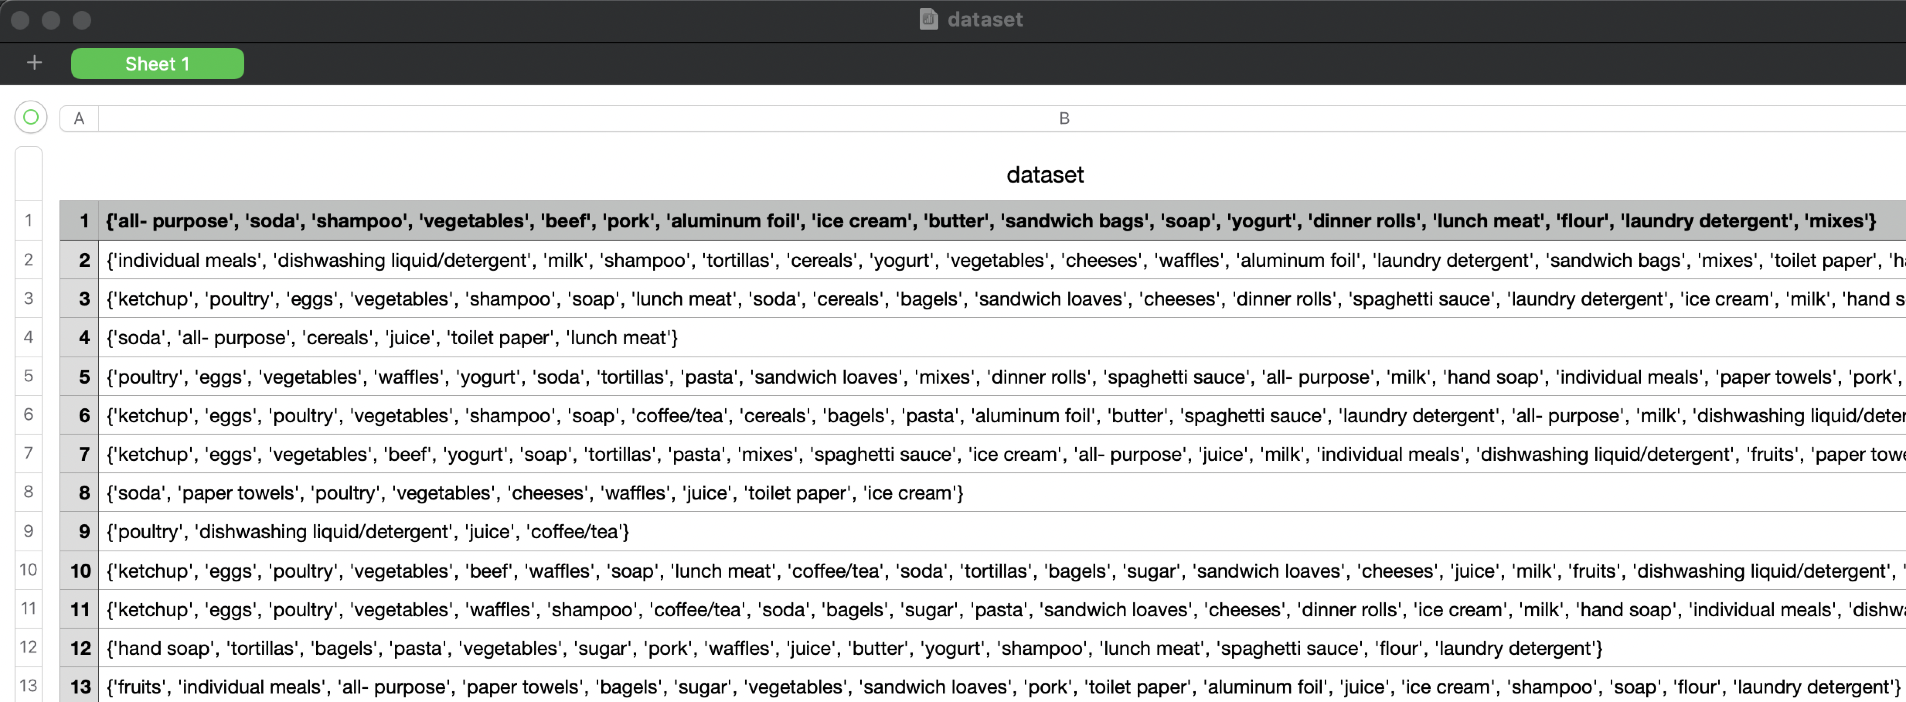

In [8]:
#screen shot of sample dataset
from IPython.display import Image
print ('ScreenShot of the sample dataset.csv')
Image("SSdataset.png")

### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [9]:
print('\nApriori depends up on two values- support (support count) and confidence support means in how many number of transaction a particular item is present out of all transactions and if the item qualifies for minimum support it goes to frequent items confidence shows how two or more items dependent on each other')
print ('\nCase 1: For minimum support = 0.1 and minimum confidence = 0.2)')
print ('\nCase 1 Reasoning:')
print('According to Apriori algorithm, if we keep the support count to minimum, the more rules it produces. As we can see when we put the minimum support as 0.10 which is 10% and minimum confidence to 0.2 which is 20% we get the greater number of rules and vice versa.')
print ('\nCase 1 Output:')
%run apriori -f dataset.csv -s .1 -c .2


Apriori depends up on two values- support (support count) and confidence support means in how many number of transaction a particular item is present out of all transactions and if the item qualifies for minimum support it goes to frequent items confidence shows how two or more items dependent on each other

Case 1: For minimum support = 0.1 and minimum confidence = 0.2)

Case 1 Reasoning:
According to Apriori algorithm, if we keep the support count to minimum, the more rules it produces. As we can see when we put the minimum support as 0.10 which is 10% and minimum confidence to 0.2 which is 20% we get the greater number of rules and vice versa.

Case 1 Output:

------------ITEMS-----------------
item: (" 'milk'", " 'yogurt'") , 0.100
item: ('"{\'yogurt\'', " 'vegetables'") , 0.100
item: (" 'pork'", " 'yogurt'") , 0.100
item: (" 'juice'", " 'soda'") , 0.100
item: (" 'vegetables'", " 'yogurt'", " 'paper towels'") , 0.100
item: (" 'vegetables'", " 'dinner rolls'", " 'cheeses'") , 0.100

Rule: (" 'beef'", " 'vegetables'") ==> (" 'laundry detergent'",) , 0.410
Rule: (" 'flour'",) ==> (" 'beef'",) , 0.411
Rule: (" 'flour'",) ==> (" 'waffles'",) , 0.411
Rule: (" 'hand soap'",) ==> (" 'pasta'",) , 0.411
Rule: (" 'dinner rolls'",) ==> (" 'vegetables'", " 'dishwashing liquid/detergent'") , 0.411
Rule: (" 'sugar'",) ==> (" 'beef'",) , 0.411
Rule: (" 'sugar'",) ==> (" 'cereals'",) , 0.411
Rule: (" 'soap'",) ==> (" 'cereals'",) , 0.411
Rule: (" 'vegetables'", " 'spaghetti sauce'") ==> (" 'sandwich loaves'",) , 0.411
Rule: (" 'vegetables'", " 'spaghetti sauce'") ==> (" 'beef'",) , 0.411
Rule: (" 'lunch meat'",) ==> (" 'dishwashing liquid/detergent'",) , 0.411
Rule: (" 'poultry'",) ==> (" 'cheeses'",) , 0.411
Rule: (" 'tortillas'", " 'vegetables'") ==> (" 'butter'",) , 0.411
Rule: (" 'cereals'",) ==> (" 'spaghetti sauce'",) , 0.411
Rule: (" 'cereals'",) ==> (" 'aluminum foil'",) , 0.411
Rule: (" 'dishwashing liquid/detergent'",) ==> (" 'waffles'",) , 0.411
Rule: (" 'eggs'", " 've

In [10]:
print ('# # # # # # # # #	Code for Task 2, Case:2 # # # # # # # # #') 
print('\nApriori depends up on two values- support (support count) and confidence support means in how many number of transaction a particular item is present out of all transactions and if the item qualifies for minimum support it goes to frequent items confidence shows how two or more items dependent on each other')
print ('\nCase 2 (minimum support = 0.2 and minimum confidence = 0.4)')
print ('\nCase 2 Reasoning:')
print('In case 2, I tried to increase the minimum support to 0.2 and minimum confidence to 0.4, thereby decreasing the rules when compared to case 1. Moreover, it would be very difficult to analyze the data and background calculations for larger datasets, so I kept the reasoning to understanding the working functionality of algorithm.')
print ('\nCase 2 Output:')
%run apriori -f dataset.csv -s .2 -c .4

# # # # # # # # #	Code for Task 2, Case:2 # # # # # # # # #

Apriori depends up on two values- support (support count) and confidence support means in how many number of transaction a particular item is present out of all transactions and if the item qualifies for minimum support it goes to frequent items confidence shows how two or more items dependent on each other

Case 2 (minimum support = 0.2 and minimum confidence = 0.4)

Case 2 Reasoning:
In case 2, I tried to increase the minimum support to 0.2 and minimum confidence to 0.4, thereby decreasing the rules when compared to case 1. Moreover, it would be very difficult to analyze the data and background calculations for larger datasets, so I kept the reasoning to understanding the working functionality of algorithm.

Case 2 Output:

------------ITEMS-----------------
item: (" 'vegetables'", " 'dinner rolls'") , 0.209
item: ('"{\'toilet paper\'',) , 0.215
item: (" 'vegetables'", " 'yogurt'") , 0.218
item: (" 'shampoo'", " 'vegetables

In [11]:
print ('# # # # # # # # #	Code for Task 2, Case:3 # # # # # # # # #') 
print('\nApriori depends up on two values- support (support count) and confidence support means in how many number of transaction a particular item is present out of all transactions and if the item qualifies for minimum support it goes to frequent items confidence shows how two or more items dependent on each other')
print ('\nCase 3 (minimum support=0.35 and minimum confidence=0.45)')
print ('\nCase 3 Reasoning:') 
print('After observing the support counts of each item in the given dataset we concluded that all the items are in range 0 to 0.35 support count and if the min-support exceeds 35% then none of the items will be considered as frequent set item and no rules will generated after on. so, to skip this case we have considered the support values which are less than 35 as minimum support. According to algorithm we can conclude that higher the support count will give no rules.')
print ('\nCase 3 Output:')
%run apriori -f dataset.csv -s 0.35 -c 0.45

# # # # # # # # #	Code for Task 2, Case:3 # # # # # # # # #

Apriori depends up on two values- support (support count) and confidence support means in how many number of transaction a particular item is present out of all transactions and if the item qualifies for minimum support it goes to frequent items confidence shows how two or more items dependent on each other

Case 3 (minimum support=0.35 and minimum confidence=0.45)

Case 3 Reasoning:
After observing the support counts of each item in the given dataset we concluded that all the items are in range 0 to 0.35 support count and if the min-support exceeds 35% then none of the items will be considered as frequent set item and no rules will generated after on. so, to skip this case we have considered the support values which are less than 35 as minimum support. According to algorithm we can conclude that higher the support count will give no rules.

Case 3 Output:

------------ITEMS-----------------
item: (" 'pork'",) , 0.352
item: (

## Report 
(separately in pdf)

Take a small dataset (it can be any dataset). Show 3 support and confidence for the small dataset. Show the rules for all the 3 cases using the formula.
Provide references where ever necessary.

In [12]:
df_sample = df_dataupdated.iloc[192:196,]
df_sample.to_csv('sampledataset.csv', header = False, index = False)
df_sampledata = pd.read_csv('sampledataset.csv', names = [''])
df_sampledata.head(6)

,
0,"{'toilet paper', 'ice cream', 'cheeses', 'paper towels', 'ketchup', 'sandwich bags', 'sandwich loaves', 'juice', 'soap', 'vegetables', 'beef', 'dinner rolls'}"
1,"{'bagels', 'milk', 'spaghetti sauce', 'pork', 'ketchup', 'sandwich bags', 'sugar', 'sandwich loaves', 'pasta'}"
2,"{'laundry detergent', 'ketchup', 'sandwich loaves', 'coffee/tea', 'tortillas', 'soap', 'pasta'}"
3,"{'ice cream', 'milk', 'all- purpose', 'fruits', 'sandwich loaves', 'dinner rolls', 'beef', 'flour', 'soda'}"


In [13]:
%run apriori -f sampledataset.csv -s .3 -c .5



------------ITEMS-----------------
item: (" 'milk'",) , 0.500
item: (" 'sandwich bags'",) , 0.500
item: (" 'beef'",) , 0.500
item: (" 'soap'",) , 0.500
item: (' \'pasta\'}"',) , 0.500
item: (" 'ketchup'", " 'sandwich bags'") , 0.500
item: (" 'sandwich loaves'", " 'soap'") , 0.500
item: (" 'sandwich loaves'", ' \'pasta\'}"') , 0.500
item: (" 'sandwich loaves'", " 'milk'") , 0.500
item: (" 'soap'", " 'ketchup'") , 0.500
item: (" 'sandwich loaves'", " 'sandwich bags'") , 0.500
item: (' \'pasta\'}"', " 'ketchup'") , 0.500
item: (" 'sandwich loaves'", " 'beef'") , 0.500
item: (" 'sandwich loaves'", ' \'pasta\'}"', " 'ketchup'") , 0.500
item: (" 'sandwich loaves'", " 'soap'", " 'ketchup'") , 0.500
item: (" 'sandwich loaves'", " 'ketchup'", " 'sandwich bags'") , 0.500
item: (" 'ketchup'",) , 0.750
item: (" 'sandwich loaves'", " 'ketchup'") , 0.750
item: (" 'sandwich loaves'",) , 1.000

------------RULES-----------------
Rule: (" 'sandwich loaves'",) ==> (" 'soap'",) , 0.500
Rule: (" 'sandwic

In [14]:
%run apriori -f sampledataset.csv -s .75 -c .75


------------ITEMS-----------------
item: (" 'ketchup'",) , 0.750
item: (" 'sandwich loaves'", " 'ketchup'") , 0.750
item: (" 'sandwich loaves'",) , 1.000

------------RULES-----------------
Rule: (" 'sandwich loaves'",) ==> (" 'ketchup'",) , 0.750
Rule: (" 'ketchup'",) ==> (" 'sandwich loaves'",) , 1.000




In [15]:
%run apriori -f sampledataset.csv -s .76 -c .1


------------ITEMS-----------------
item: (" 'sandwich loaves'",) , 1.000

------------RULES-----------------




# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [5 points] - Evaluate Results 
* [25 points] - Report 
